<a href="https://colab.research.google.com/github/athisya/10.Marketing-Retail-Analytics/blob/main/NN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description

Please note the following:

1. Apply the concepts and techniques you have learned in the previous weeks and summarise your insights at the end.

2.The Project should be submitted as a single “.HTML” and “.IPYNB” file. Else, the project will not be evaluated.

3. Kindly submit it before the deadline to avoid penalties on scores.

4. If any kind of plagiarism from any source is found in the project, it will not be evaluated and zero (0) score will be given.
5. If the code snippets in the submitted notebook are correct but not executed, 50% of the marks will be deducted for the corresponding question.



Regards

Program Office

Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries

In [137]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [138]:
# Mount Google Drive if your CSV file is stored there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
# Specify the path to your CSV file (modify it based on your file's location)
csv_path = '/content/drive/MyDrive/Colab Notebooks/AIML/NN/NN_Project_Data_Signal.csv'

In [140]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

In [141]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [142]:
df.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [143]:
df.shape

(1599, 12)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [146]:
df['Signal_Strength'].value_counts().sort_index(ascending=True)

3     10
4     53
5    681
6    638
7    199
8     18
Name: Signal_Strength, dtype: int64

Part A - Q1 B - Check for missing values and print percentage for each attribute.

In [147]:

# Calculate the percentage of missing values for each attribute
missing_percentage = (df.isnull().mean() * 100).round(2)

# Display the result
print("Percentage of missing values for each attribute:")
print(missing_percentage)

Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [148]:

# Check for duplicate records
duplicate_records = df[df.duplicated()]

# Display the duplicate records (if any)
if not duplicate_records.empty:
    print("Duplicate Records:")
    print(duplicate_records)
else:
    print("No Duplicate Records")

Duplicate Records:
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0

In [149]:
# Count the number of duplicate records
num_duplicates = df.duplicated().sum()

# Display the result
print(f"Number of Duplicate Records: {num_duplicates}")

Number of Duplicate Records: 240


In [150]:
df.drop_duplicates(inplace=True)

In [151]:
# Count the number of duplicate rows
num_duplicate_rows = df[df.duplicated()].shape[0]

# Display the result
print(f"Number of Duplicate Rows: {num_duplicate_rows}")

Number of Duplicate Rows: 0


In [152]:
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Part A - Q1 D - Visualise distribution of the target variable.

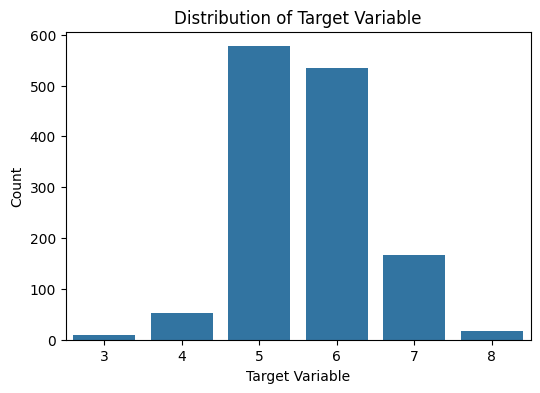

In [153]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Signal_Strength', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

In [154]:
df['Signal_Strength'].value_counts().sort_index(ascending=True)

3     10
4     53
5    577
6    535
7    167
8     17
Name: Signal_Strength, dtype: int64

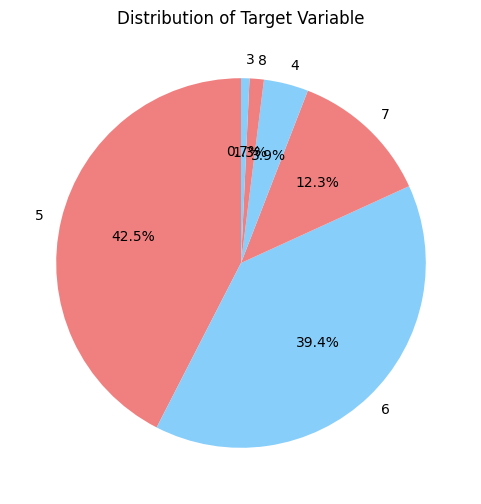

In [155]:
# Calculate the distribution of the target variable
target_distribution = df['Signal_Strength'].value_counts()

# Visualize the distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Target Variable')
plt.show()

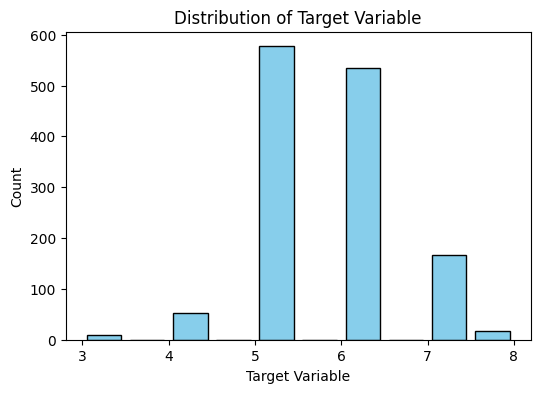

In [156]:
# Visualize the distribution of the target variable using a histogram
plt.figure(figsize=(6, 4))
plt.hist(df['Signal_Strength'], rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
#plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

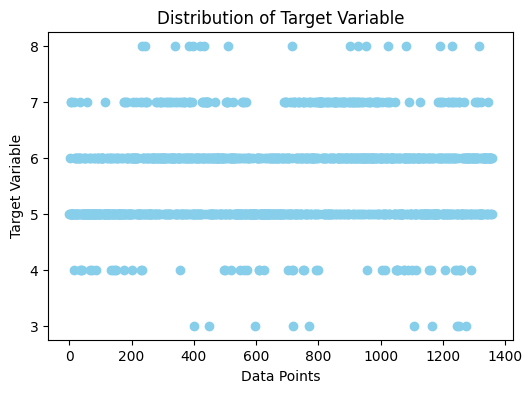

In [157]:
# Visualize the distribution of the target variable using a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(df)), df['Signal_Strength'], color='skyblue', marker='o')
plt.title('Distribution of Target Variable')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
#plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

Part A - Q1 E - Share insights from the initial data analysis (at least 2).

Part A - Q2 A - Split the data into X & Y.

In [158]:
# Arrange data into independent variables and dependent variables
X = df.drop("Signal_Strength",axis=1)  ## Features
y = df["Signal_Strength"]  ## Target

Part A - Q2 B - Split the data into train & test with 70:30 proportion.

In [159]:

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [160]:
X_train.shape

(951, 11)

In [161]:
X_test.shape

(408, 11)

In [162]:
y_train.shape

(951,)

In [163]:
y_test.shape

(408,)

Part A - Q2 D - Normalise the train and test data with appropriate method.

In [164]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
scaler = MinMaxScaler()

In [166]:
scaler.fit(X_train)

MinMaxScaler()

In [167]:
scaler.fit(X_test)

MinMaxScaler()

In [168]:
normalized_data_X_train = scaler.transform(X_train)

In [169]:
normalized_data_X_test = scaler.transform(X_test)

In [170]:

normalized_X_train = pd.DataFrame(normalized_data_X_train, columns=X_train.columns)

In [171]:

normalized_X_test = pd.DataFrame(normalized_data_X_test, columns=X_test.columns)

Part A - Q2 E - Transform Labels into format acceptable by Neural Network

In [172]:
y_train


303     5
1292    6
695     6
451     6
1309    5
       ..
828     8
1063    6
1286    6
267     8
1245    5
Name: Signal_Strength, Length: 951, dtype: int64

Part A - Q3 A - Design a Neural Network to train a classifier.

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(input_dim,)))

# Add additional hidden layers (optional)
# model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'input_dim' is not defined

Part A - Q3 B - Train the classifier using previously designed Architecture

Part A - Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy

Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.

Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.

Part B - Q1 A - Read the .h5 file and assign to a variable.

Part B - Q1 B - Print all the keys from the .h5 file.

Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test

Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.

Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.

Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

Part B - Q2 E - Transform Labels into format acceptable by Neural Network

Part B - Q2 F - Print total Number of classes in the Dataset.

Part B - Q3 A - Design a Neural Network to train a classifier.

Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).

Part B - Q3 C - Evaluate performance of the model with appropriate metrics.

Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.